# Project 1

Submitted by Diana Chou <br>
CMSC320: Introduction to Data Science <br>
Due: September 25, 2019

## Part 1: Data scraping and preparation

### STEP 1: Scrape your competitor's data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup
from datetime import datetime
from collections import defaultdict

r=requests.get('https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares')

soup=BeautifulSoup(r.content)

table=soup.find('table').find('tbody')

list=['rank','x_class','date','region','start_time','max_time','end_time','movie']

df=pd.DataFrame(columns=list, index=range(1,51))
    
row_i=0
for row in table.find_all('tr'):
    col_i=0
    columns=row.find_all('td')
    for col in columns:
        df.iat[row_i,col_i]=col.get_text()
        col_i+=1
    row_i+=1

In [2]:
# Un-comment this to view all rows in datasets
# pd.set_option('display.max_rows', None)

### SpaceWeatherLive's Top 50 Solar Flares

In [3]:
# Observe Dataframe from Step 1
df

,rank,x_class,date,region,start_time,max_time,end_time,movie
1,1,X28.0,2003/11/04,0486,19:29,19:53,20:06,MovieView archive
2,2,X20.0,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
3,3,X17.2,2003/10/28,0486,09:51,11:10,11:24,MovieView archive
4,4,X17.0,2005/09/07,0808,17:17,17:40,18:03,MovieView archive
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
6,6,X10.0,2003/10/29,0486,20:37,20:49,21:01,MovieView archive
7,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
8,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
9,9,X9.0,2006/12/05,0930,10:18,10:35,10:45,MovieView archive
10,10,X8.3,2003/11/02,0486,17:03,17:25,17:39,MovieView archive


### STEP 2: Tidy the top 50 solar flare data

In [4]:
# Drop the 'movie' column
df=df.drop(labels='movie', axis=1)

# Combine date and times into datetime objects
for i, row in df.iterrows():
    date=row['date'].split('/')
    date=[int(i) for i in date] 
    st=row['start_time'].split(':')
    st=[int(i) for i in st] 
    mt=row['max_time'].split(':')
    mt=[int(i) for i in mt] 
    et=row['end_time'].split(':')
    et=[int(i) for i in et] 
    
    row['start_time']=datetime(date[0],date[1],date[2],st[0],st[1])
    row['max_time']=datetime(date[0],date[1],date[2],mt[0],mt[1])
    row['end_time']=datetime(date[0],date[1],date[2],et[0],et[1])

df.rename(columns={'start_time':'start_datetime', 
                    'max_time':'max_datetime',
                    'end_time':'end_datetime'}, 
                     inplace=True)

# Assign dtypes
df["rank"] = pd.to_numeric(df["rank"])
df['start_datetime']=pd.to_datetime(df['start_datetime'])
df['max_datetime']=pd.to_datetime(df['max_datetime'])
df['end_datetime']=pd.to_datetime(df['end_datetime'])

d=df['date']
df.insert(len(df.columns), 'start_date', d)
df=df.drop(labels='date', axis=1)

# Change regions coded as '-' into NaN
df=df.replace(to_replace='-', value='NaN')

# Tidy up Dataframe for observation
df_step2=df[['rank', 'x_class', 'region', 'start_datetime', 'max_datetime', 'end_datetime']]

### SpaceWeatherLive's Top 50 Solar Flares (Tidied)

In [5]:
# Observe Dataframe from Step 2
df_step2

,rank,x_class,region,start_datetime,max_datetime,end_datetime
1,1,X28.0,0486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
2,2,X20.0,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
3,3,X17.2,0486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
4,4,X17.0,0808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
5,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
6,6,X10.0,0486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
7,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
8,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
9,9,X9.0,0930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
10,10,X8.3,0486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


### STEP 3: Scrape the NASA data

In [6]:
r=requests.get('https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html')

soup=BeautifulSoup(r.content)

rows=soup.find('pre').get_text().splitlines()
del rows[0:12]
del rows[-2:]

list=['start_date','start_time','end_date','end_time','start_frequency','end_frequency','flare_location',
      'flare_region','flare_classification','cme_date','cme_time','cme_angle','cme_width','cme_speed','plots']

df2=pd.DataFrame(columns=list, index=range(1,len(rows)+1))

row_i=0
for line in rows:
    sep='PHTX'
    rows[row_i]=(line.split(sep)[0]+sep).split()
    col_i=0
    for entry in rows[row_i]:
        df2.iat[row_i,col_i]=entry
        col_i+=1
    row_i+=1

### NASA's Data on Wind/WAVES type II bursts and CMEs 

In [7]:
# Observe Dataframe from Step 3
df2 

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,plots
1,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
2,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
3,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
4,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
5,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
6,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227,PHTX
7,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352,PHTX
8,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,Halo,360,785,PHTX
9,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,Halo,360,1556,PHTX
10,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441,PHTX


### STEP 4: Tidy the NASA the table

In [8]:
# Recode any missing entries as NaN (use regex to find them)
df2=df2.replace(regex=r'--[:\/]--|-{3,6}|\?{4}|FILA', value='NaN')
df2=df2[~df2.start_frequency.str.contains('NaN')]

# Create the is_halo and width_lower_bound columns 
is_halo=[]
lower_bound=[]
for i, row in df2.iterrows():
    # Adjust cme_angle and is_halo
    if (row['cme_angle'] == "Halo"):
        row['cme_angle'] = "NA"
        is_halo.append(True)
    else:
        is_halo.append(False)
    # Adjust cme_width and width_lower_bound
    if (row['cme_width'].startswith('>')):
        row['cme_width'] = re.sub("\D", "", row['cme_width'])
        lower_bound.append(True)
    else:
        lower_bound.append(False)
        
    # Turn 24:00 into 23:59 for 'end_date' column (it is only found under there)
    if (row['end_time']=='24:00'):
        df2.loc[i,'end_time'] = '23:59'
        
    # (I took the direction of turning the time to 23:59 on day T instead of
    # 00:00 on day T+1, since I based my matching algorithm on the start date 
    # and it's a lesser amount of computational modification.)
        
    # Concatenate year to end_date and cme_date, turn date and time into 
    # datetime objects, and place it back into the Dataframe
    year=row['start_date'][:5]
    df2.loc[i,'start_time'] = pd.to_datetime(row['start_date']+' '+row['start_time'])
    df2.loc[i,'end_date'] = year+row['end_date']
    df2.loc[i,'end_time'] = pd.to_datetime(row['end_date']+' '+row['end_time'])
    if row['cme_date'] != 'NaN':
        df2.loc[i,'cme_date'] = year+row['cme_date']
        df2.loc[i,'cme_time'] = pd.to_datetime(row['cme_date']+' '+row['cme_time'])
    else:
        df2.loc[i,'cme_time'] = 'NaN'

# Add the is_halo and width_lower_bound columns to the Dataframe
df2.insert(len(df2.columns), 'is_halo', is_halo)
df2.insert(len(df2.columns), 'width_lower_bound', lower_bound)

# Clean up datetime columns
df2.rename(columns={'start_time':'start_datetime',
                   'end_time':'end_datetime',
                   'cme_time':'cme_datetime'},
                    inplace=True)

# Assign dtypes
df2['start_datetime']=pd.to_datetime(df2['start_datetime'])
df2['end_datetime']=pd.to_datetime(df2['end_datetime'])
df2['cme_datetime']=pd.to_datetime(df2['cme_datetime'])
df2['start_frequency']=pd.to_numeric(df2['start_frequency'])
df2['end_frequency']=pd.to_numeric(df2['end_frequency'])

# Construct the resulting Dataframe for Step 4
df2_step4=df2[['start_datetime','end_datetime','start_frequency',
     'end_frequency','flare_location','flare_region',
     'flare_classification','cme_datetime','cme_angle',
     'cme_width','cme_speed','plots','is_halo','width_lower_bound']]

### NASA's Data on Wind/WAVES type II bursts and CMEs (Tidied)

In [9]:
# Observe Dataframe from Step 4
df2_step4

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plots,is_halo,width_lower_bound
1,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
2,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,PHTX,True,False
3,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,PHTX,True,False
4,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False
5,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False
6,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,PHTX,False,False
7,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,PHTX,False,False
8,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NA,360,785,PHTX,True,False
9,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,PHTX,True,False
10,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,PHTX,False,False


## Part 2: Analysis

### Question1: Replication<br><br> <i>If you get the top 50 solar flares from the NASA table based on their classification (e.g., X28 is the highest), do you get data for the same solar flare events?</i>

In [10]:
# Create two columns to aid in sorting the NASA dataframe by class

flare1=[] # stores the first character
flare2=[] # stores the float succeeding that character
for i, row in df2.iterrows():
    if row['flare_classification'] != 'NaN':
        fc=row['flare_classification']
        f=float(fc[1:])
        df2.loc[i,'flare_classification'] = fc[0]+str(f)
        flare1.append(fc[0])
        flare2.append(float(fc[1:]))
    else:
        flare1.append('NaN')
        flare2.append('NaN')
    
    if len(row['flare_region']) == 5:
        df2.loc[i,'flare_region'] = row['flare_region'][-4:]
        
df2.insert(len(df2.columns), 'flare1', flare1)
df2.insert(len(df2.columns), 'flare2', flare2)

# Sort the data by a solar flare's classification
df2=df2.sort_values(['flare1', 'flare2'], ascending=[False, False])
df2=df2.reset_index(drop=True)
df2.index=np.arange(1, len(df2) + 1)

# Rename the columns for data comparison with SWL's dataframe
df2.rename(columns={'flare_classification':'x_class',
                   'flare_region':'region'},
                    inplace=True)

<p><i><u>Notes in replicating the data:</u>
    <ul>
        <li>In order to sort by class, I had to split the class entry into a character (string) and a decimal number (float). I then sorted the rows in descending order using .sort_values(), passing in the two columns.</li>
        <li>SpaceWeatherLive's data entries for region only go up to 4 digits. In the case when a region number is 10XXX in NASA's data, it appears to almost be the same in SpaceWeatherLive's, but with the first digit cut off (so it becomes 0xxx). Due to this strange conversion, I had to take the last 4 digits in NASA's data in order to compare regions accurately. </li>
    </ul></i>
</p>

## Top 50 solar flares from the NASA table based on their classification:

In [11]:
# View top 50 entries from the NASA table sorted by their classification
df2[['x_class','start_datetime','end_datetime','region']].head(50)

,x_class,start_datetime,end_datetime,region
1,X28.0,2003-11-04 20:00:00,2003-11-04 23:59:00,0486
2,X20.0,2001-04-02 22:05:00,2001-04-03 02:30:00,9393
3,X17.0,2003-10-28 11:10:00,2003-10-29 23:59:00,0486
4,X14.0,2001-04-15 14:05:00,2001-04-16 13:00:00,9415
5,X10.0,2003-10-29 20:55:00,2003-10-29 23:59:00,0486
6,X9.4,1997-11-06 12:20:00,1997-11-07 08:30:00,8100
7,X9.0,2006-12-05 10:50:00,2006-12-05 20:00:00,0930
8,X8.3,2003-11-02 17:30:00,2003-11-03 01:00:00,0486
9,X7.1,2005-01-20 07:15:00,2005-01-20 16:30:00,0720
10,X6.9,2011-08-09 08:20:00,2011-08-09 08:35:00,1263


<p>In order to replicate the top 50 solar flare data table from SpaceWeatherLive.com using the data obtained from NASA, I had to: 
    <ol>
        <li>Sort the entries based on their classification (labeled as 'flare_classification'), using .sort_values()</li>
        <li>Determine which columns existed in both datasets to set them as the new columns (class, region, starting date/time, ending date/time)</li>
        <li>Display the top 50 rows in the new Dataframe, using '.head(50)'</li>
    </ol>
</p>
<p>Upon viewing the results, I could immediately see that I would not be able to replicate the SpaceWeatherLive data very well based on this category alone, as the two datasets contain differences in data as a whole, based on exact matches of sub-parts of the data. Let's take a look at differences in the solar flare's class:
</p>

In [12]:
# Data in SpaceWeatherLive's table that are not in NASA's table 
# based on EXACT matching in the 'x_class' column
df3=pd.merge(df, df2, on=['x_class'], how="outer", indicator=True)
df3=df3[df3['_merge'] =='left_only']
df3.reset_index(drop=True)
df3.index=np.arange(1, len(df3) + 1)
df3[['x_class','region_x','start_datetime_x','end_datetime_x']]

,x_class,region_x,start_datetime_x,end_datetime_x
1,X17.2,0486,2003-10-28 09:51:00,2003-10-28 11:24:00
2,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:55:00
3,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:10:00
4,X8.2,2673,2017-09-10 15:35:00,2017-09-10 16:31:00
5,X3.7,8384,1998-11-22 06:30:00,1998-11-22 06:49:00
6,X3.0,0030,2002-07-15 19:59:00,2002-07-15 20:14:00


<p> Here, we can see there are <b>six</b> classes (X17.2, X14.4, X9.3, X8.2, X3.7, X3.0) that exist in SpaceWeatherLive.com's data, but <b><i>do not</i></b> exist in the NASA dataset based on exact matches.
</p>
<p> To back up our findings, if we do a merge on SpaceWeatherLive's data, we see that there are now 62 entries, showing there are cases in which at least one class contains different values for any of the same columns (region, start_datetime, or end_datetime). The same goes for an inner-merge; we see there are 54 entries, showing there is data from SpaceWeatherLive not in NASA and vice-versa.
</p>

In [13]:
# Merge the two dataframes left based on 'x_class'
df3 = pd.merge(df['x_class'], df2['x_class'], on=['x_class'], how='left')
df3.reset_index(drop=True)
df3.index=np.arange(1, len(df3) + 1)
df3.T # set the Transpose for easier viewing

,1,2,3,4,5,6,7,8,9,10,...,53,54,55,56,57,58,59,60,61,62
x_class,X28.0,X20.0,X17.2,X17.0,X14.4,X10.0,X9.4,X9.3,X9.0,X8.3,...,X2.7,X2.7,X2.7,X2.7,X2.6,X2.6,X2.6,X2.6,X2.6,X2.6


In [14]:
# Merge the two dataframes based on 'x_class'
df3 = pd.merge(df['x_class'], df2['x_class'], on=['x_class'], how='inner')
df3.reset_index(drop=True)
df3.index=np.arange(1, len(df3) + 1)
df3.T # set the Transpose for easier viewing

,1,2,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
x_class,X28.0,X20.0,X17.0,X10.0,X9.4,X9.0,X8.3,X7.1,X6.9,X6.5,...,X2.7,X2.7,X2.7,X2.7,X2.6,X2.6,X2.6,X2.6,X2.6,X2.6


### Question 2: Integration<br><br> <i>Write a function that finds the best matching row in the NASA data for each of the top 50 solar flares in the SpaceWeatherLive data.</i>

In [15]:
def best_row_match(d1,d2):
    # Do an inner merge the two Dataframes to see entries that intersect on the starting date
    df=d1.merge(d2, how = 'inner', on = ['start_date'])
    
    # Take into consideration duplicates as well as variances in class and region
    df=df[~((df[['start_date']].duplicated(keep=False)) 
        & ((df.x_class_x != df.x_class_y) | (df.region_x != df.region_y)))] 
    df=df.sort_values(['rank'])
    
    # Tidy up resulting Dataframe
    df.rename(columns={
        'x_class_y':'x_class',
        'region_y':'region',
        'end_datetime_y':'end_datetime',
        'start_datetime_y':'start_datetime'
    }, inplace=True)
    df.reset_index(drop=True)
    df.index=np.arange(1, len(df) + 1)
    df.insert(len(df.columns), 'index', df.index)
    df=df[['rank','start_datetime','end_datetime','start_frequency','end_frequency',
           'flare_location','region','x_class','cme_datetime','cme_angle','cme_width',
           'cme_speed','plots','is_halo','width_lower_bound','index']]
    # 'index' refers to the rank of our top 50 flares from NASA's data
    # 'rank' indicates the matching entry in SWL's Dataframe
    
    # Add a new column to NASA dataset indicating its rank
    
    # Use -1 as a default value for rank
    d2['toprank'] = '-1'
    for i, nasa_row in d2.iterrows():
        for j, res_row in df.iterrows():
            # Assign rank accordingly based on the index in the top 50 Dataframe
            if nasa_row['start_datetime'] == res_row['start_datetime']:
                d2.loc[i,'toprank'] = df.loc[j,'index']
    
    return df

### Best matching rows in NASA's data to SpaceWeatherLive's data:

In [16]:
# Un-comment this to view all the columns in the dataset
# pd.set_option('display.max_columns', None)
res = best_row_match(df,df2)
res

,rank,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,region,x_class,cme_datetime,cme_angle,cme_width,cme_speed,plots,is_halo,width_lower_bound,index
1,1,2003-11-04 20:00:00,2003-11-04 23:59:00,10000,200,S19W83,0486,X28.0,2003-11-04 19:54:00,NA,360,2657,PHTX,True,False,1
2,2,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.0,2001-04-02 22:06:00,261,244,2505,PHTX,False,False,2
3,3,2003-10-28 11:10:00,2003-10-29 23:59:00,14000,40,S16E08,0486,X17.0,2003-10-28 11:30:00,NA,360,2459,PHTX,True,False,3
4,4,2005-09-07 18:05:00,2005-09-08 00:00:00,12000,200,S11E77,0808,X1.7,NaT,NaN,NaN,NaN,PHTX,False,False,4
5,5,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.0,2001-04-15 14:06:00,245,167,1199,PHTX,False,False,5
6,6,2003-10-29 20:55:00,2003-10-29 23:59:00,11000,500,S15W02,0486,X10.0,2003-10-29 20:54:00,NA,360,2029,PHTX,True,False,6
7,7,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,PHTX,True,False,7
8,9,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,0930,X9.0,NaT,NaN,NaN,NaN,PHTX,False,False,8
9,10,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,0486,X8.3,2003-11-02 17:30:00,NA,360,2598,PHTX,True,False,9
10,12,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,0720,X7.1,2005-01-20 06:54:00,NA,360,882,PHTX,True,False,10


<p>After looking through both sets of data, I determined that the best way I could measure equality in both sets of solar flare data is by measuring factors with minimum variance, which I determined to be a solar flare's <b>class, region, and date of occurence</b>.</p>    
<p>In my algorithm I first merge the two dataframes by the <b>starting date</b>, and then check that the <b>flare class</b> and <b>region</b> match up, but I also include cases where the class is not the same (but region is) and vice versa. This decision was made after looking at merging the two dataframes on only those factors (so on only x_class, or only region, etc.).
</p>
<p>Merging on only start date seemed to give the most concise results, and after looking through the data in both sets, I could see there existed solar flares that had: the same date and region (but different class), or the same date and class (but different region). Therefore, I took into consideration solar flares that had missing classifications from the NASA data (refer to rank 44 from the SWL table).</p>
<p>In this process, I also realized that the date column in SpaceWeatherLive's data is also ambiguous. As shown in NASA's data, some of the solar flares have different starting and ending dates, indicated by 'start_date' and 'end_date'. Thus, I presumed that the date in their data more likely referred to a solar flare's starting date rather than its ending date.
</p>
<p>Thus, the above dataframe shows my results from the algorithm I used to find the best matching rows from the NASA data to SpaceWeatherLive's data, sorted in order of their rank (based off SpaceWeatherLive's table). <u>The <b>rank</b> column here indicates the rank in SWL's data.</u> Out of the desired 50, only 36 entries showed equality in at least two of the three defining characteristics I chose. 
</p>

In [17]:
# The NASA Dataframe from Part 1 Step 4, with the 'toprank' column added
# (Remember that the Dataframe is currently sorted by the flare class)
# Entries that are not in the top 50 solar flares have a rank of -1

df2[['toprank','x_class','region']].T # set the Transpose for easier viewing

,1,2,3,4,5,6,7,8,9,10,...,496,497,498,499,500,501,502,503,504,505
toprank,1,2,3,5,6,7,8,9,10,11,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
x_class,X28.0,X20.0,X17.0,X14.0,X10.0,X9.4,X9.0,X8.3,X7.1,X6.9,...,C1.2,C1.1,C1.1,C1.0,B9.5,B9.4,B7.9,B6.6,B4.5,B3.8
region,0486,9393,0486,9415,0486,8100,0930,0486,0720,1263,...,DIM,8141,NaN,NaN,0956,8116,8222,8214,EP,NaN


### Entries from SpaceWeatherLive NOT found in NASA

In [18]:
diff=pd.merge(df, res, on=['rank'], how="outer", indicator=True)
diff=diff[diff['_merge'] =='left_only']

# Sort missing entries by date (makes it easier to visually compare with NASA's data)
diff=diff.sort_values(['start_date']) 
diff.reset_index(drop=True)
diff.index=np.arange(1, len(diff) + 1)

# 'rank' indicates the matching entry in SWL's Dataframe
diff[['rank','x_class_x','region_x','start_datetime_x','max_datetime','end_datetime_x']]

,rank,x_class_x,region_x,start_datetime_x,max_datetime,end_datetime_x
1,23,X4.9,8307,1998-08-18 22:10:00,1998-08-18 22:19:00,1998-08-18 22:28:00
2,43,X2.8,8307,1998-08-18 08:14:00,1998-08-18 08:24:00,1998-08-18 08:32:00
3,27,X3.9,8307,1998-08-19 21:35:00,1998-08-19 21:45:00,1998-08-19 21:50:00
4,30,X3.7,8384,1998-11-22 06:30:00,1998-11-22 06:42:00,1998-11-22 06:49:00
5,36,X3.3,8395,1998-11-28 04:54:00,1998-11-28 05:52:00,1998-11-28 06:13:00
6,16,X6.2,9733,2001-12-13 14:20:00,2001-12-13 14:30:00,2001-12-13 14:35:00
7,20,X5.4,0486,2003-10-23 08:19:00,2003-10-23 08:35:00,2003-10-23 08:49:00
8,32,X3.6,0649,2004-07-16 13:49:00,2004-07-16 13:55:00,2004-07-16 14:01:00
9,21,X5.4,0808,2005-09-08 20:52:00,2005-09-08 21:06:00,2005-09-08 21:17:00
10,33,X3.6,0808,2005-09-09 09:42:00,2005-09-09 09:59:00,2005-09-09 10:08:00


<p>To further explore on my integration, I extracted the data that was not found in the NASA dataset that existed in SpaceWeatherLive's top 50, to explore reasons there were no matches close enough to be selected.</p>
<p>I sorted the results by date instead of class to imitate NASA's organization in their dataset (they sort their data by the starting date of a solar flare, from older to most recent). <u>The <b>rank</b> column here indicates the rank in SWL's data.</u> Some observations include:</p>
<ul>
    <li>NASA's data has not been updated in a while, in fact the most recent recorded solar flare was August 15, 2016, and we can definitely see there are two solar flares in SpaceWeatherLive's dataset that took place in September of 2017.
    </li>
    <li>NASA has no recordings of any solar flares during August of 1998, and nothing close to other dates listed in the table of missing solar flares.
    </li>
</ul>

### Question 2: Analysis<br><br> <i>Prepare one plot that shows the top 50 solar flares in context with all data available in the NASA dataset.</i>

### Scatterplots showing Solar Flare Frequency vs. Year of Occurence

In [19]:
# Sort Dataframe by year (our x-axis will be the year that a solar flare occurs)
df2=df2.sort_values(['start_datetime'])
df2['year'] = 0
for i, row in df2.iterrows():
    df2.loc[i,'year'] = row['start_date'][:4]
df2['year']=pd.to_numeric(df2['year'])

# Create dict of colors coordinating with the top 50 solar flares

# col1 used for starting frequency (y-axis)
col1 = defaultdict(lambda : 'red')
col1['-1'] = 'gray'
c1 = df2.toprank.map(col1)

# col2 used for ending frequency (y-axis)
col2 = defaultdict(lambda : 'blue')
col2['-1'] = 'gray'
c2 = df2.toprank.map(col2)

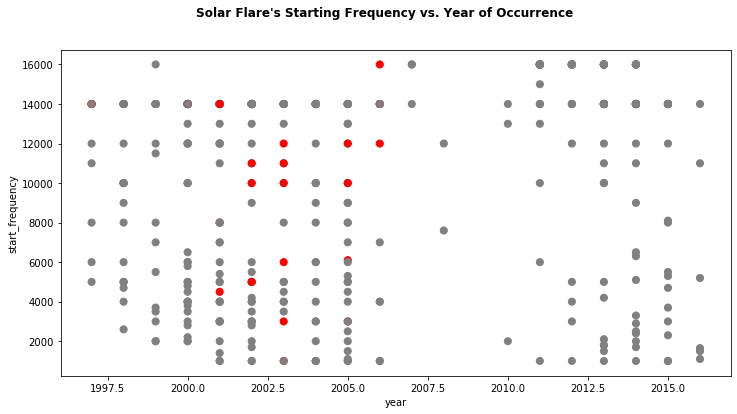

In [20]:
df2.plot.scatter('year', 'start_frequency', s=50, color=c1, marker='o', figsize=(12, 6))
plt.suptitle("Solar Flare's Starting Frequency vs. Year of Occurrence", fontweight="bold")
plt.show()

<p>Let's analyze the starting frequencies of the top 50 solar flares in comparison to the starting frequencies of the rest of the solar flare entries in the NASA dataset over time. The <u>top 50 flares</u> are indicated by the <b style='color:red'>red dots</b>.</p>
<p>Looking at all solar flares, there appears to be high deviation in the starting frequencies, with many entries clustering in upper and lower frequencies. There also seems to be a period where there weren't many flares (between year 2007 and 2010).</p> 
<p>Now, focusing on the top 50 flares, we can see that the frequencies also varied widely, with the lowest, s, where 2000kHz < s < 4000kHz, and the highest, b, where b >= 16000kHz. Also, it appears the top 50 solar flares occured between the years 2000 and 2006.
</p>

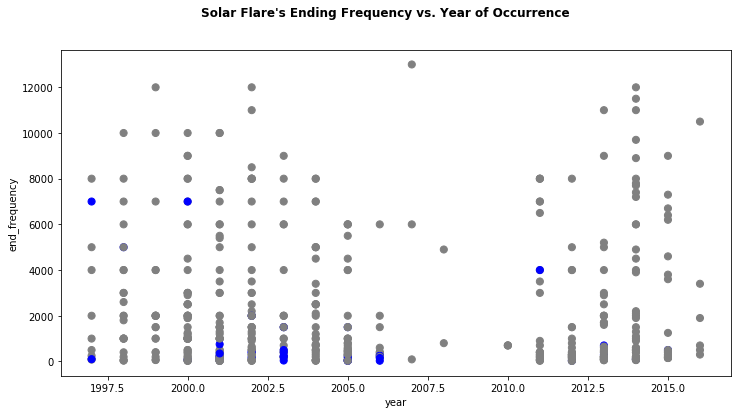

In [21]:
df2.plot.scatter('year', 'end_frequency', s=50, color=c2, marker='o', figsize=(12, 6))
plt.suptitle("Solar Flare's Ending Frequency vs. Year of Occurrence", fontweight="bold")
plt.show()

<p>Here, we look at the ending frequencies of solar flares, and the data suggests that flares tended to end with lower frequencies (we see clustering dots between 0 and around 4000kHz). We also see the same period of low activity between 2007 and 2010. The <u>top 50 flares</u> here are indicated by the <b style='color:blue'>blue dots</b>. 
</p>
<p>The top flares seemed to have ending frequencies occur at either 0kHz or around 7000kHz and spanned pretty evenly between 1996 and 2006, with an occurance of 4000kHz in 2010 and a low-level frequency in 2013 as well.
</p>

### Proportion of Halo CMEs in the NASA Dataset

In [22]:
# Find percentages of Halo CMEs in the NASA dataset as a whole
halo_NASA = df2.is_halo.value_counts('True')[1]
nothalo_NASA = 1 - halo_NASA

# Find percentages of Halo CMEs in the top 50 flares from NASA
halo_top = res.is_halo.value_counts('True')[1]
nothalo_top = 1 - halo_top

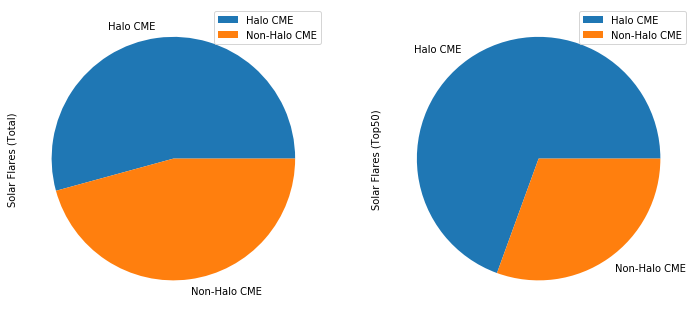

In [23]:
df_h = pd.DataFrame({'Solar Flares (Total)': [halo_NASA, nothalo_NASA],
                    'Solar Flares (Top50)': [halo_top, nothalo_top]}, 
                     index=['Halo CME', 'Non-Halo CME'])
plot=df_h.plot.pie(subplots=True, figsize=(12, 6))

<p><i>"Coronal mass ejections (CMEs) are gigantic bubbles of electrified gas that billow away from the Sun. CMEs aimed at Earth are called "halo events" because of the way they look in coronagraph images. As the expanding cloud of an Earth-directed CME looms larger and larger it appears to envelop the Sun, forming a halo around our star."</i> - <u>spaceweather.com</u></p>
<p>In the above pie charts, we are looking at the proportions of Halo CMEs to non-Halo CMEs in solar flares according to NASA's data. From the left pie chart, we see the comparison in all the flares in the NASA dataset, whereas in the right pie chart, we focus on the difference in only the top 50 flares.</p>
<p>In general, it seems there's a split between Halo and non-Halo CMEs in all recorded solar flares. However, we can see that <b><i>2/3 of the top 50 solar flares are also Halo flares!</i></b></p>